In [1]:
import requests
import json
import pandas as pd
import csv

yourapikey = "jEHXLRe13pKScLWAfz4dCSM1ADNPFRDeVEmJ5WtQ"
youremail = "tbm17160@hotmail.com"

In [38]:
url = 'https://developer.nrel.gov/api/solar/nsrdb_data_query.json?api_key=jEHXLRe13pKScLWAfz4dCSM1ADNPFRDeVEmJ5WtQ&lat=1.371661&lon=103.823306'
response = requests.get(url).json()

print(json.dumps(response, indent = 1))

{
 "inputs": {
  "body": {},
  "params": {},
  "query": {
   "lat": "1.371661",
   "lon": "103.823306"
  }
 },
 "metadata": {
  "version": "2.0.0",
  "resultset": {
   "count": 4
  }
 },
 "status": 200,
 "outputs": [
  {
   "apiDocs": "https://developer.nrel.gov/docs/solar/nsrdb/himawari-download/",
   "availableIntervals": [
    10,
    30,
    60
   ],
   "enabled": true,
   "displayName": "Himawari",
   "metadataLink": "https://nsrdb.nrel.gov",
   "name": "himawari",
   "ranking": 20,
   "availableYears": [
    2016,
    2017,
    2018,
    2019,
    2020
   ],
   "apiUrl": "https://developer.nrel.gov/api/nsrdb/v2/solar/himawari-download",
   "links": [
    {
     "year": 2016,
     "interval": 10,
     "link": "https://developer.nrel.gov/api/nsrdb/v2/solar/himawari-download.csv?names=2016&wkt=POINT%28103.823306+1.371661%29&interval=10&api_key=yourapikey&email=youremail"
    },
    {
     "year": 2017,
     "interval": 10,
     "link": "https://developer.nrel.gov/api/nsrdb/v2/solar/

In [41]:
url = f"https://developer.nrel.gov/api/nsrdb/v2/solar/himawari-download.csv?\
names=2016&wkt=POINT%28103.823306+1.371661%29&interval=10&api_key={yourapikey}&email={youremail}"

response = requests.get(url)

In [44]:
open('test.csv', 'wb').write(response.content)

5848221

In [47]:
with open('some_file.csv', 'wb') as opened_file:
    opened_file.write(response.content)

In [48]:
df = pd.read_csv("test.csv", skiprows=2)
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2016,1,1,0,0,26.6,78,276,133,6,...,3,60,0.252,94.54,78.48,0.15,1011,5.8,20,3.3
1,2016,1,1,0,10,26.8,89,336,170,6,...,3,76,0.252,93.44,76.21,0.15,1011,5.8,21,3.3
2,2016,1,1,0,20,26.9,99,389,207,6,...,0,93,0.252,92.90,73.94,0.15,1011,5.8,21,3.4
3,2016,1,1,0,30,27.0,108,435,245,6,...,0,158,0.252,92.36,71.68,0.15,1011,5.8,22,3.5
4,2016,1,1,0,40,27.2,121,457,282,7,...,0,180,0.253,92.39,69.42,0.15,1011,5.8,22,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,2016,12,31,23,10,25.4,0,0,0,1,...,0,0,0.253,96.75,89.64,0.12,1005,5.9,23,2.1
52556,2016,12,31,23,20,25.4,18,93,22,1,...,0,22,0.253,96.75,87.55,0.12,1005,5.9,23,2.1
52557,2016,12,31,23,30,25.4,30,195,45,1,...,0,45,0.253,96.75,85.34,0.12,1005,5.9,23,2.1
52558,2016,12,31,23,40,25.4,40,290,75,3,...,3,36,0.253,96.75,83.09,0.12,1005,5.9,23,2.1


In [49]:
import seaborn as sns

<AxesSubplot:xlabel='GHI', ylabel='Count'>

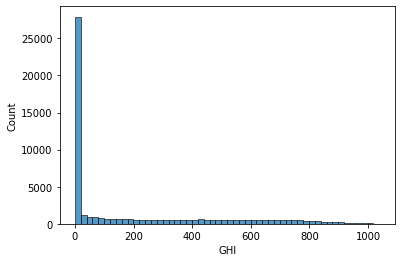

In [50]:
sns.histplot(data=df, x=df.GHI)

<AxesSubplot:>

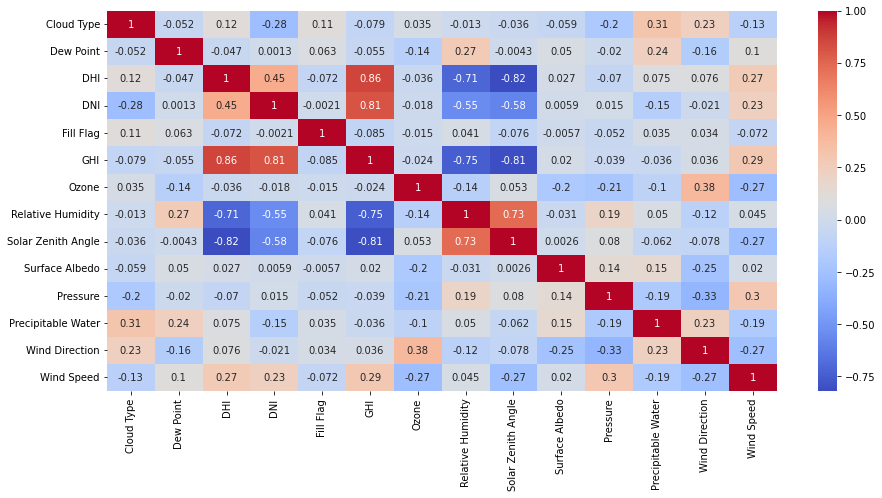

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 7))
sns.heatmap(df.loc[:,"Cloud Type":].corr(method="pearson"),cmap='coolwarm',annot=True)